###

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

Mounted at /content/drive


In [ ]:
!pip install datasets

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split

In [ ]:
email_data = pd.read_csv('/content/drive/My Drive/大四下/網路安全的資料科學/Final Project/CEAS_08.csv')

In [ ]:
email_data

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1
...,...,...,...,...,...,...,...
39149,CNN Alerts <charlene-detecton@btcmarketing.com>,email1007@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:34:50 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
39150,CNN Alerts <idgetily1971@careplusnj.org>,email104@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:35:11 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
39151,Abhijit Vyas <xpojhbz@gmail.com>,fxgmqwjn@triptracker.net,"Fri, 08 Aug 2008 22:00:43 +0800",Slideshow viewer,Hello there ! \nGreat work on the slide show v...,0,0
39152,Joseph Brennan <vupzesm@columbia.edu>,zqoqi@spamassassin.apache.org,"Fri, 08 Aug 2008 09:00:46 -0500",Note on 2-digit years,"\nMail from sender , coming from intuit.com\ns...",0,0


In [ ]:
email_data = email_data[['body', 'label']]
email_data['label'] = email_data['label'].astype(int)
email_data['label'] = email_data['label'].map({0: 'Non-Fraud Email', 1: 'Fraud Email'})
email_data

<ipython-input-24-4f7475d22931>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_data['label'] = email_data['label'].astype(int)
<ipython-input-24-4f7475d22931>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_data['label'] = email_data['label'].map({0: 'Non-Fraud Email', 1: 'Fraud Email'})


,body,label
0,"Buck up, your troubles caused by small dimensi...",Fraud Email
1,\nUpgrade your sex and pleasures with these te...,Fraud Email
2,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,Fraud Email
3,Would anyone object to removing .so from this ...,Non-Fraud Email
4,\nWelcomeFastShippingCustomerSupport\nhttp://7...,Fraud Email
...,...,...
39149,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,Fraud Email
39150,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,Fraud Email
39151,Hello there ! \nGreat work on the slide show v...,Non-Fraud Email
39152,"\nMail from sender , coming from intuit.com\ns...",Non-Fraud Email


In [ ]:
email_counts = email_data['label'].value_counts()
email_data = email_data.dropna()
email_counts

label
Fraud Email        21842
Non-Fraud Email    17312
Name: count, dtype: int64

In [ ]:
email_data = email_data.rename(columns={"body":"text","label": "label"})
email_data = email_data.reset_index(drop=True)

email_data

,text,label
0,"Buck up, your troubles caused by small dimensi...",Fraud Email
1,\nUpgrade your sex and pleasures with these te...,Fraud Email
2,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,Fraud Email
3,Would anyone object to removing .so from this ...,Non-Fraud Email
4,\nWelcomeFastShippingCustomerSupport\nhttp://7...,Fraud Email
...,...,...
39149,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,Fraud Email
39150,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,Fraud Email
39151,Hello there ! \nGreat work on the slide show v...,Non-Fraud Email
39152,"\nMail from sender , coming from intuit.com\ns...",Non-Fraud Email


In [ ]:
import matplotlib.pyplot as plt

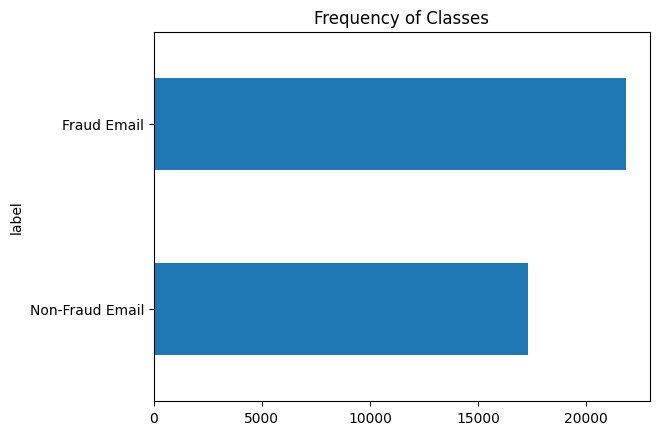

In [ ]:
email_data["label"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

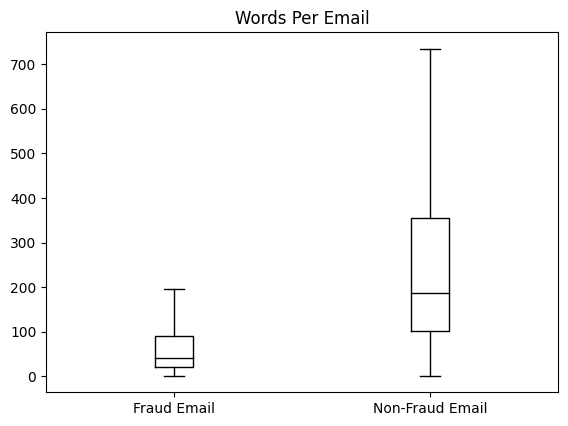

In [ ]:
email_data["Words Per Email"] = email_data["text"].str.split().apply(len)
email_data.boxplot("Words Per Email", by="label", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [ ]:
# Extract the email bodies and labels
x = email_data['text'].tolist()
y = email_data['label'].apply(lambda label: 1 if label == 'Fraud Email' else 0).tolist()

In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
# Load model and tokenizer
model_checkpoint = "distilbert-base-uncased"
model = TFDistilBertForSequenceClassification.from_pretrained(model_checkpoint, num_labels=2)
tokenizer = DistilBertTokenizer.from_pretrained(model_checkpoint)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [ ]:
model.summary()

Model: "tf_distil_bert_for_sequence_classification_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  66362880  
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_79 (Dropout)        multiple                  0 (unused)
                                                                 
Total params: 66955010 (255.41 MB)
Trainable params: 66955010 (255.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
MAX_LEN = 512

In [ ]:
def chunk_text(text, tokenizer, max_len=MAX_LEN):
    tokens = tokenizer(text, truncation=False, padding=False)['input_ids']
    chunks = [tokens[i:i + max_len] for i in range(0, len(tokens), max_len)]
    return chunks

In [ ]:
chunked_encodings = []
chunked_labels = []
for text, label in zip(x, y):
    chunks = chunk_text(text, tokenizer, max_len=MAX_LEN)
    chunked_encodings.extend(chunks)
    chunked_labels.extend([label] * len(chunks))

Token indices sequence length is longer than the specified maximum sequence length for this model (1468 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
# Encode each chunk
input_ids = []
attention_masks = []
for chunk in chunked_encodings:
    encoded = tokenizer.encode_plus(
        chunk,
        max_length=MAX_LEN,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )
    input_ids.append(encoded['input_ids'])
    attention_masks.append(encoded['attention_mask'])

input_ids = tf.concat(input_ids, axis=0)
attention_masks = tf.concat(attention_masks, axis=0)
labels = tf.convert_to_tensor(chunked_labels)

# Convert to TensorFlow Dataset
dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': input_ids, 'attention_mask': attention_masks}, labels))

In [ ]:
# Split the dataset
TEST_SPLIT = 0.2
BATCH_SIZE = 8

dataset_size = len(chunked_encodings)
train_size = int(dataset_size * (1 - TEST_SPLIT))

In [ ]:
dataset = dataset.shuffle(dataset_size)
tfdataset_train = dataset.take(train_size)
tfdataset_test = dataset.skip(train_size)

tfdataset_train = tfdataset_train.batch(BATCH_SIZE)
tfdataset_test = tfdataset_test.batch(BATCH_SIZE)

In [ ]:
from keras import activations, optimizers, losses

In [ ]:
from transformers import create_optimizer

In [ ]:
N_EPOCHS = 2

model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')
num_train_steps = len(tfdataset_train)
optimizer, schedule = create_optimizer(
    init_lr=2e-5,
    num_warmup_steps=1_000,
    num_train_steps=num_train_steps,
    weight_decay_rate=0.01,
)
model.compile(optimizer=optimizer, metrics=['accuracy'])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [ ]:
# Train the model
model.fit(
    tfdataset_train,
    validation_data=tfdataset_test,
    batch_size=BATCH_SIZE,
    epochs=N_EPOCHS
)

Epoch 1/2
6277/6277 [==============================] - 3271s 513ms/step - loss: 0.0410 - accuracy: 0.9837 - val_loss: 0.0043 - val_accuracy: 0.9989
Epoch 2/2
6277/6277 [==============================] - 3197s 509ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.0051 - val_accuracy: 0.9985


In [ ]:
# Assuming 'model' is your TFBertForMaskedLM instance
model.save_pretrained("/content/drive/My Drive/my_model")

# Save the tokenizer as well
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
tokenizer.save_pretrained("/content/drive/My Drive/my_model")

('/content/drive/My Drive/my_model/tokenizer_config.json',
 '/content/drive/My Drive/my_model/special_tokens_map.json',
 '/content/drive/My Drive/my_model/vocab.txt',
 '/content/drive/My Drive/my_model/added_tokens.json')

### Accuracy Testing with a new dataset

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

In [ ]:
test_data = pd.read_csv('/content/drive/My Drive/大四下/網路安全的資料科學/Final Project/fraud_email_.csv')
test_data

,Text,Class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0
...,...,...
11924,Travel well. I'll look forward to hearing your...,0
11925,"Dear friend, I wish to begin by way of introdu...",1
11926,Follow Up Flag: Follow upFlag Status: FlaggedM...,0
11927,sbwhoeop B6Saturday January 23 2010 4:09 PMRe:...,0


In [ ]:
test_data['Class'] = test_data['Class'].astype(int)
test_data['Class'] = test_data['Class'].map({0: 'Non-Fraud Email', 1: 'Fraud Email'})
test_data

,Text,Class
0,Supply Quality China's EXCLUSIVE dimensions at...,Fraud Email
1,over. SidLet me know. Thx.,Non-Fraud Email
2,"Dear Friend,Greetings to you.I wish to accost ...",Fraud Email
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,Fraud Email
4,Not a surprising assessment from Embassy.,Non-Fraud Email
...,...,...
11924,Travel well. I'll look forward to hearing your...,Non-Fraud Email
11925,"Dear friend, I wish to begin by way of introdu...",Fraud Email
11926,Follow Up Flag: Follow upFlag Status: FlaggedM...,Non-Fraud Email
11927,sbwhoeop B6Saturday January 23 2010 4:09 PMRe:...,Non-Fraud Email


In [ ]:
test_data = test_data.rename(columns={"Text":"text","Class": "label"})

In [ ]:
test_data

,text,label
0,Supply Quality China's EXCLUSIVE dimensions at...,Fraud Email
1,over. SidLet me know. Thx.,Non-Fraud Email
2,"Dear Friend,Greetings to you.I wish to accost ...",Fraud Email
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,Fraud Email
4,Not a surprising assessment from Embassy.,Non-Fraud Email
...,...,...
11924,Travel well. I'll look forward to hearing your...,Non-Fraud Email
11925,"Dear friend, I wish to begin by way of introdu...",Fraud Email
11926,Follow Up Flag: Follow upFlag Status: FlaggedM...,Non-Fraud Email
11927,sbwhoeop B6Saturday January 23 2010 4:09 PMRe:...,Non-Fraud Email


In [ ]:
# Extract the text and labels
test_texts = test_data['text'].tolist()
test_labels = test_data['label'].apply(lambda label: 1 if label == 'Fraud Email' else 0).tolist()

In [ ]:
def chunk_text(text, tokenizer, max_len=512):
    if not isinstance(text, str):
        print(f"Warning: Expected string input, got {type(text)}")
        return []
    tokens = tokenizer(text, truncation=False, padding=False)['input_ids']
    chunks = [tokens[i:i + max_len] for i in range(0, len(tokens), max_len)]
    return chunks

In [ ]:
MAX_LEN = 512

In [ ]:
chunked_encodings = []
chunked_labels = []
def preprocess_texts(texts, tokenizer, max_len=512):
    chunked_encodings = []
    chunked_labels = []

    for text in texts:
        chunks = chunk_text(text, tokenizer, max_len)
        chunked_encodings.extend(chunks)
        chunked_labels.extend([label] * len(chunks))

    input_ids = []
    attention_masks = []

    for chunk in chunked_encodings:
        encoded = tokenizer.encode_plus(
            chunk,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            return_tensors='tf'
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])

    input_ids = tf.concat(input_ids, axis=0)
    attention_masks = tf.concat(attention_masks, axis=0)
    return {'input_ids': input_ids, 'attention_mask': attention_masks}, chunked_labels

encodings, chunked_labels = preprocess_texts(test_texts, tokenizer, max_len=MAX_LEN)

In [ ]:
# Load original DistilBERT model
original_model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

# Load fine-tuned DistilBERT model
fine_tuned_model = TFDistilBertForSequenceClassification.from_pretrained("/content/drive/My Drive/my_model")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [ ]:
# Create TensorFlow Dataset for test data
test_dataset = tf.data.Dataset.from_tensor_slices((encodings, chunked_labels)).batch(8)

# Function to get predictions
def get_predictions(model, dataset):
    predictions = []
    for batch in dataset:
        inputs, labels = batch
        logits = model(inputs).logits
        batch_predictions = tf.argmax(tf.nn.softmax(logits, axis=-1), axis=1).numpy()
        predictions.extend(batch_predictions)
    return predictions

# Get predictions from both models
original_predictions = get_predictions(original_model, test_dataset)
fine_tuned_predictions = get_predictions(fine_tuned_model, test_dataset)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Calculate accuracy for original model
original_accuracy = accuracy_score(chunked_labels, original_predictions)
print(f'Original DistilBERT Model Accuracy: {original_accuracy*100:.4f}')

# Calculate accuracy for fine-tuned model
fine_tuned_accuracy = accuracy_score(chunked_labels, fine_tuned_predictions)
print(f'Fine-Tuned DistilBERT Model Accuracy: {fine_tuned_accuracy*100:.4f}')

Original DistilBERT Model Accuracy: 77.6825
Fine-Tuned DistilBERT Model Accuracy: 94.4551
